# Patterns of Rides in Ford GoBike System

## Investigation Overview

In this investigation, I wanted to look at the Patterns that users usually take and the Most insightfull user characteristics

## Dataset Overview

The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data Features Details about the ride from their start, End Locations to their durations, Start & end time, User Details

In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [51]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Ford_GoBike_Updated.csv')

## Distribution of Ride During the day

Rides Show a pattern of increase in the start of the day at 6-9 Am then a gradual decrease until 4-6 PM it's an Increase Again which Can Be explained by The Cycle of Work,Uni,schools as they're mostly at this time and the Highest percentage of users are workers which we will observe Later

### How can We Benefit From this ?
Adding more bike stations near workplaces, downtown, universities, or places with alot of stores
       

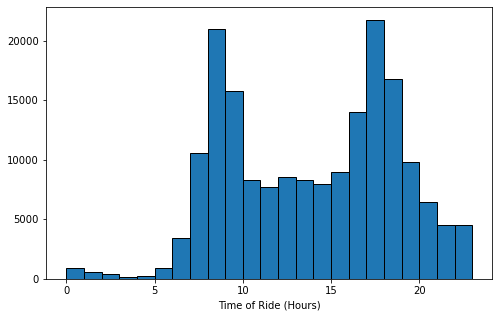

In [52]:
#Histogram of the distibution of the hours
binsize = 1  
bins = np.arange(0, df['hour'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'hour', bins=bins, edgecolor = "black")
plt.xlabel('Time of Ride (Hours)')

plt.show()# convert cut, color, and clarity into ordered categorical types


## Distribution of Ride During the Week

From the previous Visual and the current visual we can be sure of the work cycle pattern of the rides as most rides are during the weekday then drop during the weekend

### How can We Benefit From this ?
We can add more stations near parks or entartainment places where users usually go during the weekend to increase the number of rides during it
       

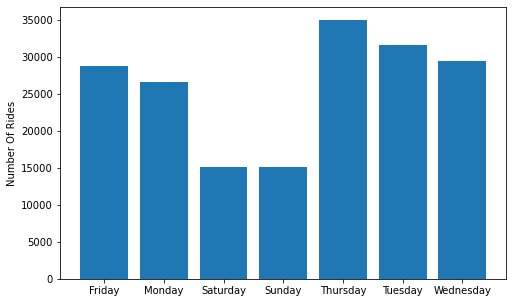

In [53]:
# plotting each Weekday
weekday_count = df['weekday'].value_counts().sort_index()

plt.figure(figsize=[8, 5])
plt.bar(data = weekday_count, x = weekday_count.index,height=weekday_count.values)
plt.ylabel('Number Of Rides')

plt.show()

## Users day Balance (Morning)

The Day is mostly skewed toward work cycle as the age decreases and gets more normally distributed as the age increase which can be explained by the activites of certain age group for example users in their 20s-40s have various places which they normally attend like Universities, Work while older aged users would probably be retired so their day is more distibuted

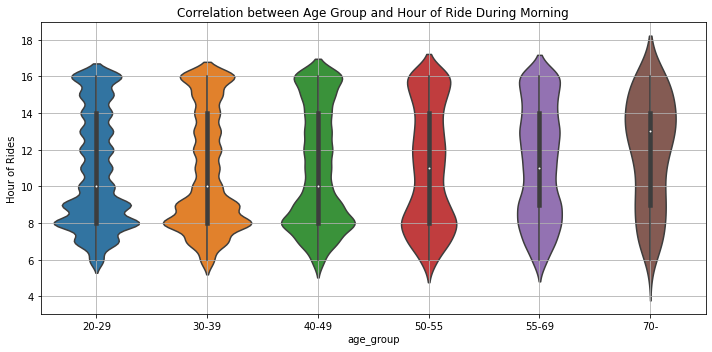

In [54]:
current_year = 2017  
df['age'] = current_year - df['member_birth_year']
ageborder = [20, 30, 40, 50, 55, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-55', '55-69', '70-']
df['age_group'] = pd.cut(df['age'], bins=ageborder, labels=labels)  

# Create subplots
fig, axes = plt.subplots(figsize=(10, 5))

# Correlation in the morning
df_morning = df[(df['hour'] >= 6) & (df['hour'] <= 16)]
sns.violinplot(data=df_morning, x='age_group', y='hour')
axes.set_title('Correlation between Age Group and Hour of Ride During Morning')
axes.set_ylabel('Hour of Rides')
axes.grid(True)


# Adjust layout and display
plt.tight_layout()
plt.show()

## Users day Balance (Evening)



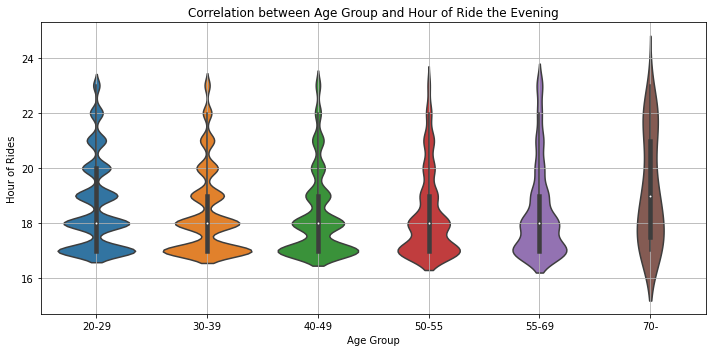

In [55]:
fig, axes = plt.subplots(figsize=(10, 5))

# Correlation in the evening
df_evening = df[ (df['hour'] > 16)]
sns.violinplot(data=df_evening, x='age_group', y='hour')
axes.set_title('Correlation between Age Group and Hour of Ride the Evening')
axes.set_ylabel('Hour of Rides')
axes.set_xlabel('Age Group')
axes.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Ride Duration Distribution (minutes)

We can see that most Rides lie between 5-25 minutes which indicate a close distance trip but are these trips normally around the same areas or are they mostly in the surrounding or other areas,we will see this in the next Visual

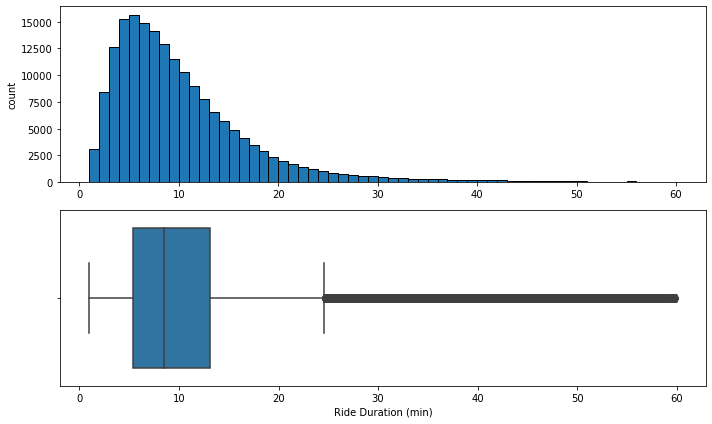

In [56]:
# distribution of ride duration after filtering
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration (min)')
plt.tight_layout()
plt.show()

## Where do users normally go to?

we can notice that there isn't a clear pattern as there's some areas that mostly have ride inside of the area only,we can explain it by the users prefrence as in some areas depending on the walkability & Bike Score of this area some users would prefer to take the bike for closer rides which explains why most of the rides are inside of the same area

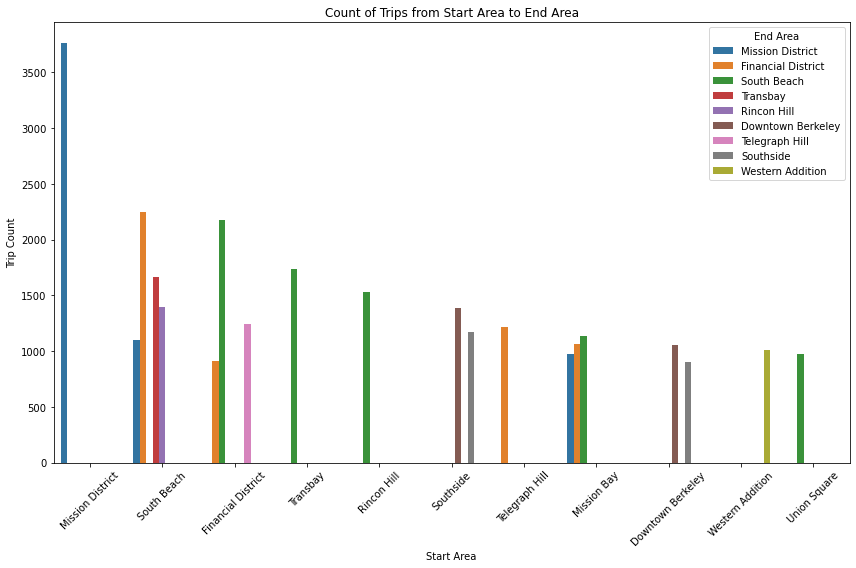

In [57]:
trip_counts = df.groupby(['start_area', 'end_area']).size().sort_values(ascending=False).reset_index(name='trip_count').iloc[:20]
trip_counts


plt.figure(figsize=(12, 8))
sns.barplot(x='start_area', y='trip_count', hue='end_area', data=trip_counts)
plt.title('Count of Trips from Start Area to End Area')
plt.xlabel('Start Area')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.legend(title='End Area', loc='upper right')
plt.tight_layout()
plt.show()


## Distribution of Rides in highest ride denisty areas during the week

We can see that count varies each day and significantly drops everywhere during the end of the week but we can notice the count of rides during the weekend doesn't significantly decrease as the total ride count decrease we can look more on that by seeing the areas in the middle of the rankings

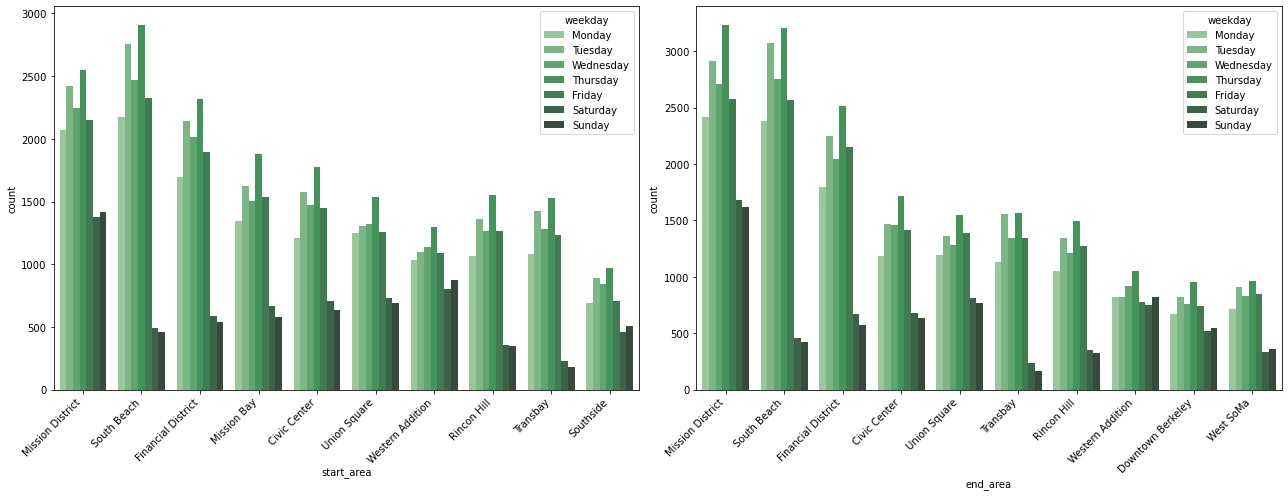

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=[18, 7])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
top_start_areas = df['start_area'].value_counts().sort_values(ascending=False).head(10).index
start_area_order = df.loc[df['start_area'].isin(top_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df[df['start_area'].isin(top_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = plt.subplot(1, 2, 2)
top_end_areas = df['end_area'].value_counts().sort_values(ascending=False).head(10).index
end_area_order = df.loc[df['end_area'].isin(top_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df[df['end_area'].isin(top_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

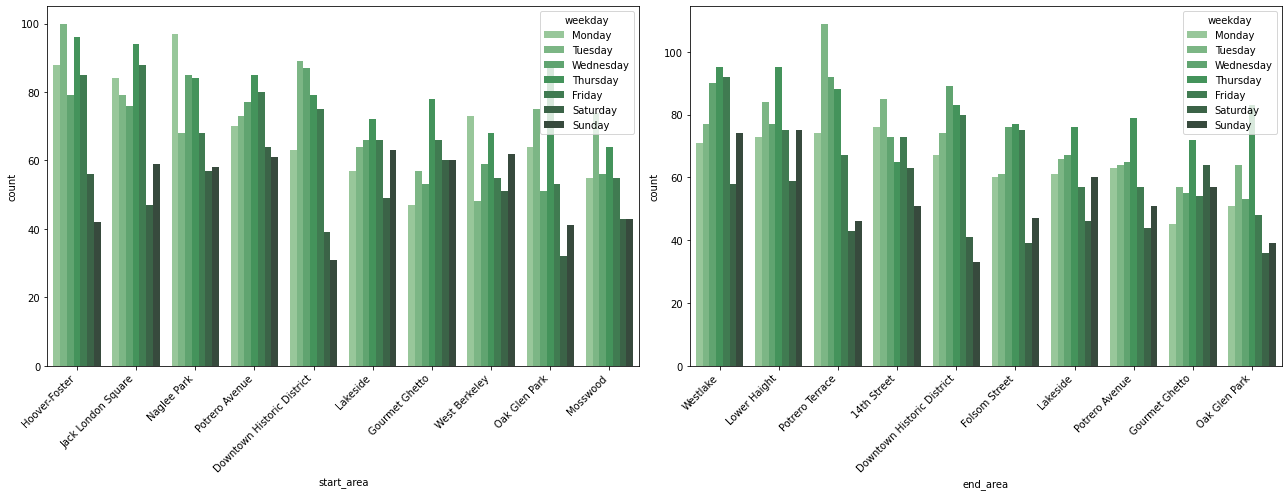

In [59]:
middle_start_areas = df['start_area'].value_counts().iloc[int(len(df['start_area'].unique())/2):int((len(df['start_area'].unique())/2)+10)].index
middle_end_areas = df['end_area'].value_counts().iloc[int(len(df['end_area'].unique())/2):int((len(df['end_area'].unique())/2)+10)].index

fig, ax = plt.subplots(ncols=2, figsize=[18, 7])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
start_area_order = df.loc[df['start_area'].isin(middle_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df[df['start_area'].isin(middle_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


ax2 = plt.subplot(1, 2, 2)
end_area_order = df.loc[df['end_area'].isin(middle_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df[df['end_area'].isin(middle_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see the decrease is less significant and doesn't appear in some areas

## Our Users by gender

We can see that most of the users are men and by a significant number which isn't a good indication considering women are 50% of the workforce and can be a great increase if we directed some advertisments or helped to view comfort in usage of bike in your everyday activity

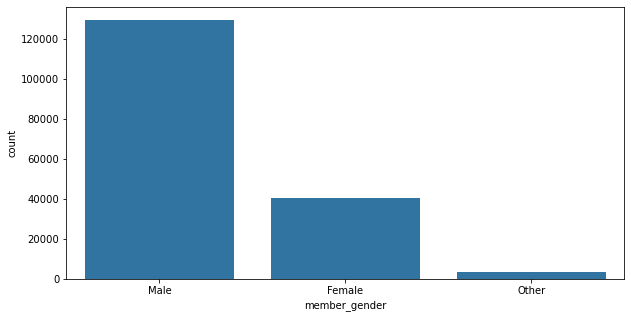

In [60]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.countplot(data = df, x = 'member_gender', color = default_color)
plt.show()

## The Type of the Software User

The Type of our Users are moslty Subscribed but if we wanted to increase the number of Users considering amount of customers is nearly 10% and they use the bike more on average we can make the bike a higher fare for customers but give them the first ride for free or for a discount if they subscibed which most propably would work on most customers 

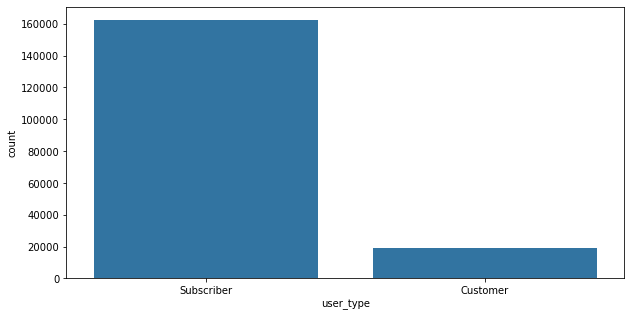

In [61]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.countplot(data = df, x = 'user_type', color = default_color)
plt.show()


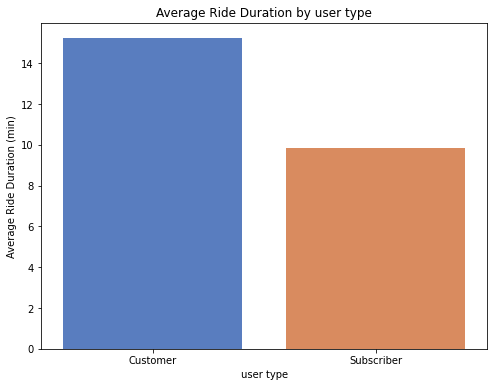

In [62]:

# Group by user type and calculate the mean ride duration
user_avg_duration = df.groupby('user_type')['ride_duration'].mean().reset_index()

# Plot average ride duration by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=user_avg_duration, x='user_type', y='ride_duration', palette='muted')
plt.title('Average Ride Duration by user type')
plt.xlabel('user type')
plt.ylabel('Average Ride Duration (min)')
plt.show()

In [63]:
!jupyter nbconvert Ford_GoBike_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_Part2.ipynb to slides
[NbConvertApp] Writing 844930 bytes to Ford_GoBike_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\I7\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\I7\anaconda3\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\I7\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\I7\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\I7\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\I7\anaconda3\lib\site-p